# Loading the important modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Loading the data

In [2]:
df=pd.read_csv("spam_data",sep="\t")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


There are 5572 rows and 5 columns in spam dataset.All rows are Nan in Unnamed: 2,Unnamed: 3,Unnamed: 4 so we should drop these columns.

In [4]:
df.drop("Unnamed: 2",axis=1,inplace=True)

In [5]:
df.drop("Unnamed: 3",axis=1,inplace=True)

In [6]:
df.drop("Unnamed: 4",axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Unnamed: 2,Unnamed: 3,Unnamed: 4 columns are droped. We can give new name to the columns, because nothing is being known form v1 and v2.  

In [8]:
df.rename(columns={"v1":"class_label","v2":"message"},inplace=True)                

In [9]:
df.tail()

,class_label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


Columns names has changed.

In [10]:
df.dtypes

class_label    object
message        object
dtype: object

Both columns have object type of data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_label  5572 non-null   object
 1   message      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


There are 5572 rows in dataset. 

# CHECKING NULL VALUES

In [13]:
df.isnull().sum()

class_label    0
message        0
dtype: int64

<AxesSubplot: >

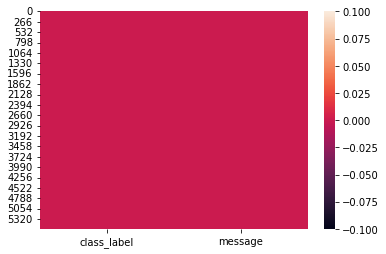

In [14]:
sns.heatmap(df.isnull())

There are no null values in spam dataset.

# STATISTICAL SUMMARY

In [15]:
df.describe()

,class_label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


There are 2 unique values in class_label which are ham and spam. There are 5169 unique values in massage. 

# DATA VISUALIZATION OR EDA

In [17]:
df.keys()

Index(['class_label', 'message'], dtype='object')

In [18]:
df["class_label"].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

<AxesSubplot: xlabel='class_label', ylabel='count'>

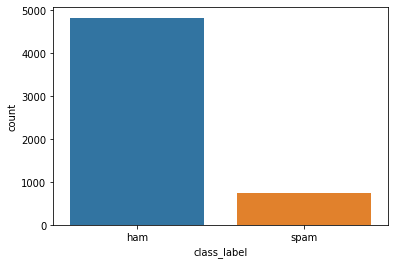

In [23]:
sns.countplot(x="class_label", data=df)

There are 4825 ham and 747 spam in dataset.

In [24]:
df["message"].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

Lenght of message is 5169.

In [25]:
df_spam = df[df.class_label=='spam']
df_spam


,class_label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


All rows of spam.

In [44]:
#separate both classes
df_ham = df[df.class_label=='ham']
df_spam = df[df.class_label=='spam']

#convert to list

ham_list=df_ham['message'].tolist()
spam_list= df_spam['message'].tolist()


filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_spam = filtered_spam.lower()

filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()

In [46]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)

In [47]:
from sklearn.model_selection import train_test_split
# 30% test, 70% train split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size = 0.3, random_state = 0)

print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))
type(x_train)

rows in test set: (1672,)
rows in train set: (3900,)


pandas.core.series.Series

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize email text into tfidf matrix
# TfidfVectorizer converts collection of raw documents to a matrix of TF-IDF features.
# It's equivalent to CountVectorizer followed by TfidfTransformer.
list = x_train.tolist()
vectorizer = TfidfVectorizer(
    input= list ,  # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(list) #gives tf idf vector
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector

In [49]:
from sklearn.naive_bayes import MultinomialNB

# train a classifier
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

In [50]:
# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 100.00%


In [51]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = y_test.tolist() 
predicted = labels 
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted) )

score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1672]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1672

    accuracy                           1.00      1672
   macro avg       1.00      1.00      1.00      1672
weighted avg       1.00      1.00      1.00      1672

F-Measure: 0.000
